In [18]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Cargar los datos

In [23]:
# Cargar el archivo train.csv desde la misma carpeta
td = pd.read_csv('train.csv')

# Ver las primeras filas del archivo
td.head()



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 1. Limpieza de Datos
> Información general sobre los datos

> Descripción estadística de las columnas numéricas

> Recuento de valores nulos

> Eliminar duplicados

> Buscar valores extraños. Para ello, ver los valores distintos en cada feature

> Ver porcentaje de valores nulos en cada columna

> Imputar valores nulos

> Pasar datos categóricos a numéricos 

In [24]:
#Información general sobre los datos
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [25]:
# Descripción estadística de las columnas numéricas
td.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [26]:
# Recuento de valores nulos
td.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [27]:
# Buscar valores extraños. Para ello, ver los valores distintos en cada feature
columns = td.columns
n_values = [td[a].unique() for a in td.columns]

cuenta = pd.DataFrame()
cuenta['features'] = columns
cuenta['n_values'] = n_values
cuenta

,features,n_values
0,PassengerId,"[0001_01, 0002_01, 0003_01, 0003_02, 0004_01, ..."
1,HomePlanet,"[Europa, Earth, Mars, nan]"
2,CryoSleep,"[False, True, nan]"
3,Cabin,"[B/0/P, F/0/S, A/0/S, F/1/S, F/0/P, F/2/S, G/0..."
4,Destination,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]"
5,Age,"[39.0, 24.0, 58.0, 33.0, 16.0, 44.0, 26.0, 28...."
6,VIP,"[False, True, nan]"
7,RoomService,"[0.0, 109.0, 43.0, 303.0, 42.0, 39.0, 73.0, 71..."
8,FoodCourt,"[0.0, 9.0, 3576.0, 1283.0, 70.0, 483.0, 1539.0..."
9,ShoppingMall,"[0.0, 25.0, 371.0, 151.0, 3.0, 17.0, nan, 589...."


In [28]:
# Ver porcentaje de valores nulos en cada columna
missing_percentage = td.isnull().mean() * 100
print(missing_percentage)


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [29]:
# separar la columna Cabin en 3 componentes 

td[['Deck', 'Num', 'Side']] = td['Cabin'].str.split('/', expand=True)

In [30]:
# Mostrar una vista previa de los primeros datos después de la imputación
td.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [31]:
# Eliminamos la columna Cabin
td.drop(['Cabin','ShoppingMall','Spa','Num'],axis=1,inplace=True)


In [32]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Reemplazar las columnas categóricas existentes por valores numéricos
td['HomePlanet'] = label_encoder.fit_transform(td['HomePlanet'])
td['CryoSleep'] = label_encoder.fit_transform(td['CryoSleep'])
td['Deck'] = label_encoder.fit_transform(td['Deck'])  # Si ya has simplificado la cabina
td['Side'] = label_encoder.fit_transform(td['Side'])
td['Name'] = label_encoder.fit_transform(td['Name'])
td['Destination'] = label_encoder.fit_transform(td['Destination'])
td['VIP'] = label_encoder.fit_transform(td['VIP'])
td['Transported'] = label_encoder.fit_transform(td['Transported'])  # También para la columna objetivo



In [33]:
# Nuevo data con columnas imputadas 

td.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Name,Transported,Deck,Side
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,5252,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,44.0,4502,1,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,49.0,457,0,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,193.0,7149,0,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,2.0,8319,1,5,1


## 2. Visualización de Datos

> Distribución de variables numéricas

> Distribución de variables categóricas

> Relación entre variables numéricas y la variable objetivo (Transported)

> Relación entre variables categóricas y la variable objetivo (Transported)

> Matriz de correlación

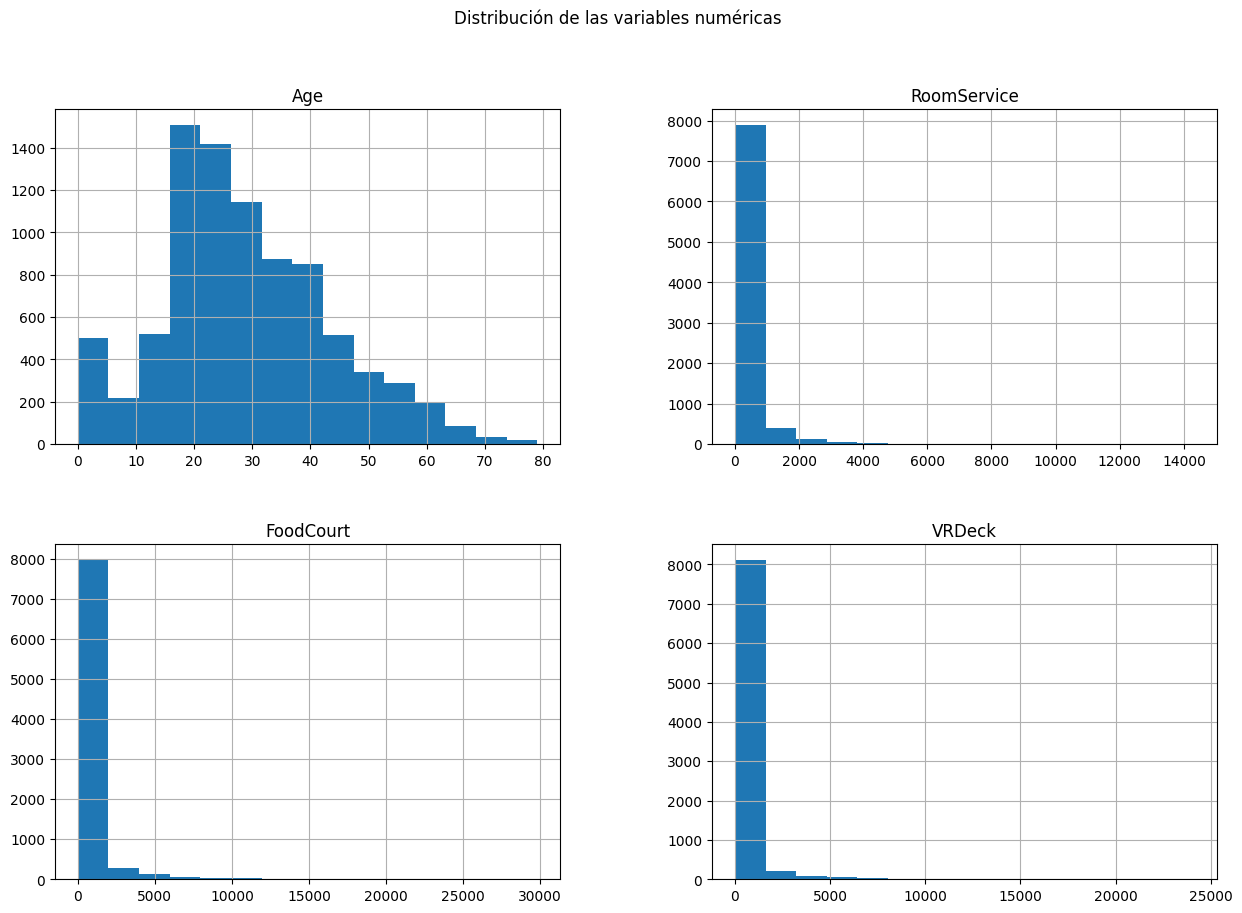

In [34]:
import matplotlib.pyplot as plt

# Crear histogramas para las columnas numéricas
numeric_columns = ['Age', 'RoomService', 'FoodCourt','VRDeck']

td[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de las variables numéricas')
plt.show()


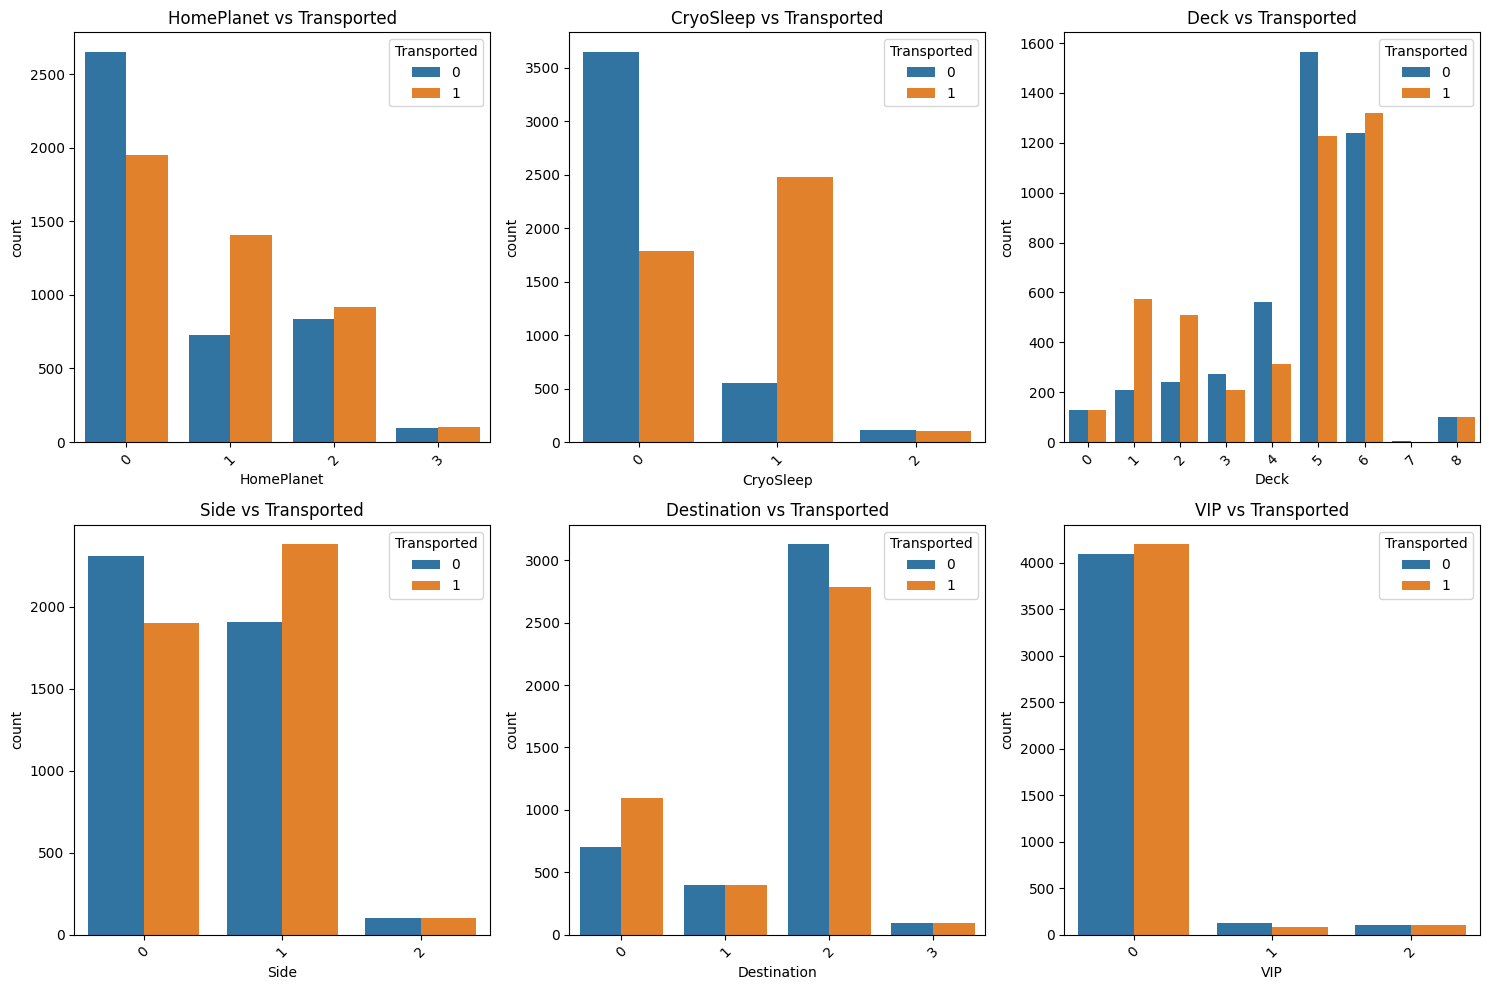

In [35]:
# Gráfico de barras para ver la relación entre las variables categóricas y Transported

import seaborn as sns

# Crear gráficos de barras para las columnas categóricas
categorical_columns = ['HomePlanet', 'CryoSleep', 'Deck', 'Side', 'Destination', 'VIP']
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=td, x=column, hue='Transported')
    plt.title(f'{column} vs Transported')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


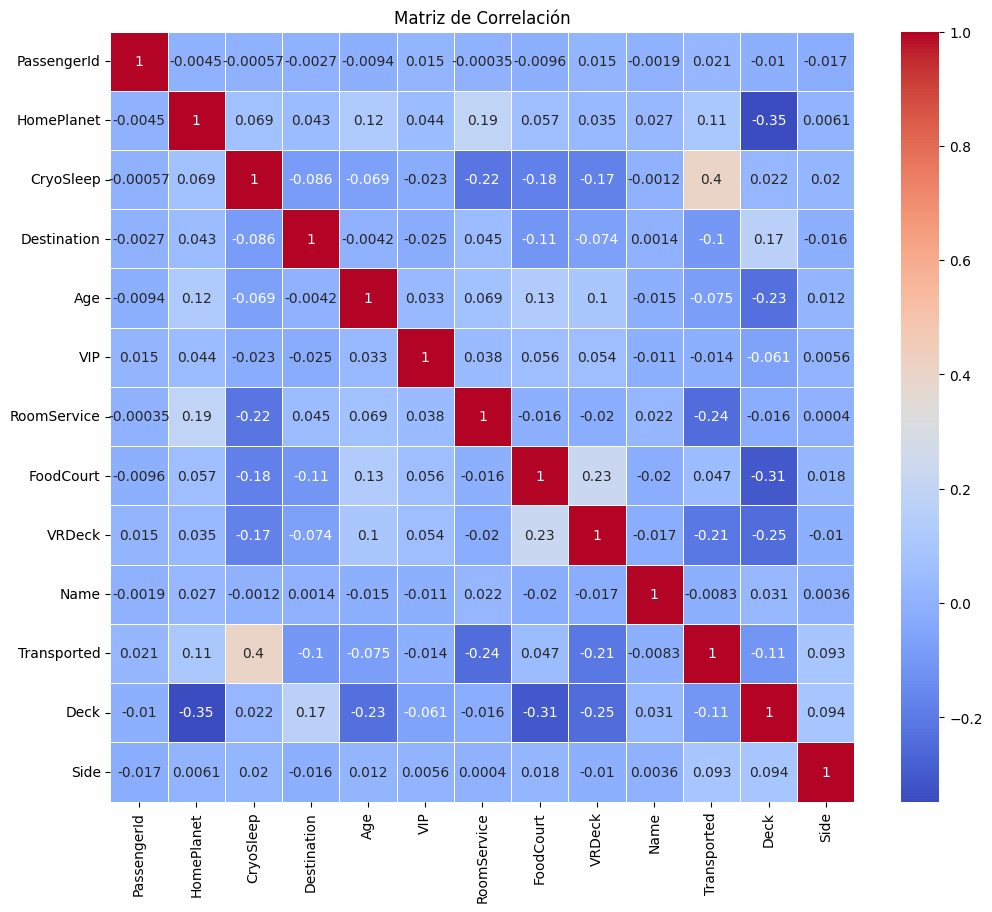

In [36]:
# Matriz de correlación
corr_matrix = td.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [37]:
td.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Name,Transported,Deck,Side
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,5252,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,44.0,4502,1,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,49.0,457,0,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,193.0,7149,0,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,2.0,8319,1,5,1


## 3. Preparación para el Modelado

In [38]:
X = td.drop('Transported', axis=1)
y = td['Transported']

In [39]:
# Dividir en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Verificar las formas de los conjuntos de datos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (6954, 12)
Forma de X_test: (1739, 12)
Forma de y_train: (6954,)
Forma de y_test: (1739,)


In [41]:
   
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Cargar los datos y preprocesarlos
td= pd.read_csv('train.csv')

# Codificar variables categóricas
X = td.drop(columns=['Transported', 'PassengerId', 'Name'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Imputar valores nulos
X_encoded.fillna(X_encoded.median(), inplace=True)
y = td['Transported']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Lista de modelos a probar
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier())
]

# Evaluación de cada modelo con validación cruzada
for name, model in models:
    scores = cross_val_score(model, X_encoded, y, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Seleccionar el mejor modelo y entrenarlo
best_model_name, best_model = max(models, key=lambda x: np.mean(cross_val_score(x[1], X_encoded, y, cv=5)))
best_model.fit(X_train, y_train)

# Evaluar el mejor modelo
y_pred_best = best_model.predict(X_test)
print(f"\nMejor modelo: {best_model_name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Random Forest: 0.7810 (+/- 0.0200)
Gradient Boosting: 0.7897 (+/- 0.0245)
SVM: 0.7857 (+/- 0.0262)
KNN: 0.7652 (+/- 0.0164)

Mejor modelo: Gradient Boosting
Accuracy: 0.7855

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.72      0.77       861
        True       0.76      0.85      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.78      0.78      1739
weighted avg       0.79      0.79      0.78      1739



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Definir los hiperparámetros a probar
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

# Instanciar el modelo Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb, 
    param_distributions=param_dist, 
    n_iter=50,      # Número de combinaciones a probar
    scoring='accuracy', 
    cv=5,           # Validación cruzada con 5 particiones
    verbose=2, 
    random_state=42, 
    n_jobs=-1       # Usar todos los núcleos disponibles
)

# Realizar la búsqueda de hiperparámetros
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Evaluar el modelo con los mejores hiperparámetros
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar las métricas de rendimiento
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 7, 'learning_rate': 0.01}

Accuracy: 0.7918343875790684

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.75      0.78       861
        True       0.77      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [58]:
import joblib

# Guardar el modelo entrenado en un archivo
joblib.dump(best_model, 'modelo_gradient_boosting.pkl')

# Para cargar el modelo en el futuro
# modelo_cargado = joblib.load('modelo_gradient_boosting.pkl')


['modelo_gradient_boosting.pkl']

## Transformar y comparar Datos test.csv

In [44]:
# Cargar el archivo train.csv desde la misma carpeta
new_data = pd.read_csv('test.csv')

# Ver las primeras filas del archivo
new_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [45]:
#Información general sobre los datos
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [46]:
# descripción estadística de las columnas numéricas 
new_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [47]:
# Recuento de valores nulos
new_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [48]:
# Buscar valores extraños. Para ello, ver los valores distintos en cada feature
columns = new_data.columns
n_values = [new_data[a].unique() for a in new_data.columns]

cuenta = pd.DataFrame()
cuenta['features'] = columns
cuenta['n_values'] = n_values
cuenta

,features,n_values
0,PassengerId,"[0013_01, 0018_01, 0019_01, 0021_01, 0023_01, ..."
1,HomePlanet,"[Earth, Europa, Mars, nan]"
2,CryoSleep,"[True, False, nan]"
3,Cabin,"[G/3/S, F/4/S, C/0/S, C/1/S, F/5/S, F/7/P, B/2..."
4,Destination,"[TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, nan]"
5,Age,"[27.0, 19.0, 31.0, 38.0, 20.0, 21.0, 23.0, 24...."
6,VIP,"[False, nan, True]"
7,RoomService,"[0.0, 10.0, 339.0, 932.0, 2.0, 26.0, nan, 39.0..."
8,FoodCourt,"[0.0, 9.0, 6652.0, 1615.0, nan, 639.0, 3.0, 74..."
9,ShoppingMall,"[0.0, 635.0, 263.0, 136.0, nan, 253.0, 243.0, ..."


In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer


# Paso 1: Imputar columnas numéricas con la mediana
imputer_num = SimpleImputer(strategy='median')  # Corregido aquí
num_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
new_data[num_cols] = imputer_num.fit_transform(new_data[num_cols])

# Paso 2: Imputar columnas categóricas con el valor más frecuente
imputer_cat = SimpleImputer(strategy='most_frequent')  # Corregido aquí
cat_cols = new_data.select_dtypes(include=['object']).columns
new_data[cat_cols] = imputer_cat.fit_transform(new_data[cat_cols])

# Verificar los resultados
print("Valores nulos después de imputación:\n", new_data.isnull().sum())

Valores nulos después de imputación:
 PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


In [50]:
# Nuevo data con columnas imputadas 

new_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [51]:
# separar la columna Cabin en 3 componentes 

new_data[['Deck', 'Num', 'Side']] = new_data['Cabin'].str.split('/', expand=True)

In [52]:
# Eliminamos la columna Cabin
new_data.drop(['Cabin','ShoppingMall','Spa','Num'],axis=1,inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador
label_encoder = LabelEncoder()

# Reemplazar las columnas categóricas existentes por valores numéricos
new_data['HomePlanet'] = label_encoder.fit_transform(new_data['HomePlanet'])
new_data['CryoSleep'] = label_encoder.fit_transform(new_data['CryoSleep'])
new_data['Deck'] = label_encoder.fit_transform(new_data['Deck'])  # Si ya has simplificado la cabina
new_data['Side'] = label_encoder.fit_transform(new_data['Side'])
new_data['Name'] = label_encoder.fit_transform(new_data['Name'])
new_data['Destination'] = label_encoder.fit_transform(new_data['Destination'])
new_data['VIP'] = label_encoder.fit_transform(new_data['VIP'])




In [60]:
# Nuevo data con columnas numéricas
new_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Name,Deck,Side
0,0,0,1,2,27.0,0,0.0,0.0,0.0,2912,6,1
1,1,0,0,2,19.0,0,0.0,9.0,0.0,2406,5,1
2,2,1,1,0,31.0,0,0.0,0.0,0.0,3376,2,1
3,3,1,0,2,38.0,0,0.0,6652.0,585.0,2711,2,1
4,4,0,0,2,20.0,0,10.0,0.0,0.0,668,5,1


In [61]:
# Cargar el conjunto de datos de prueba

submission_id = new_data.PassengerId
submission_id

0          0
1          1
2          2
3          3
4          4
        ... 
4272    4272
4273    4273
4274    4274
4275    4275
4276    4276
Name: PassengerId, Length: 4277, dtype: int64

In [65]:
new_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Name,Deck,Side
0,0,0,1,2,27.0,0,0.0,0.0,0.0,2912,6,1
1,1,0,0,2,19.0,0,0.0,9.0,0.0,2406,5,1
2,2,1,1,0,31.0,0,0.0,0.0,0.0,3376,2,1
3,3,1,0,2,38.0,0,0.0,6652.0,585.0,2711,2,1
4,4,0,0,2,20.0,0,10.0,0.0,0.0,668,5,1


In [66]:
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Paso 1: Cargar el conjunto de prueba
test_data = pd.read_csv('test.csv')

# Paso 2: Preprocesar el conjunto de prueba de la misma manera que el conjunto de entrenamiento
# Imputar valores nulos
num_imputer = SimpleImputer(strategy='median')
num_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[num_cols] = num_imputer.fit_transform(test_data[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols = test_data.select_dtypes(include=['object']).columns
test_data[cat_cols] = cat_imputer.fit_transform(test_data[cat_cols])

# Codificar las variables categóricas (usando LabelEncoder si se usó en el entrenamiento)
label_encoder = LabelEncoder()
for col in cat_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col].astype(str))

# Paso 3: Reindexar el conjunto de prueba para que coincida con las columnas del conjunto de entrenamiento
# Asegúrate de que 'X_train' tiene las mismas columnas con las que entrenaste el modelo
test_data = test_data.reindex(columns=X_train.columns, fill_value=0)

# Paso 4: Cargar el modelo Gradient Boosting entrenado
best_model = joblib.load('./modelo_gradient_boosting.pkl')

# Paso 5: Realizar las predicciones con el modelo cargado
predictions = best_model.predict(test_data)

# Paso 6: Crear el archivo de submission
submission_id = pd.read_csv('test.csv')['PassengerId']  # Asegúrate de tener la columna 'PassengerId'
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': predictions.astype(bool)})

# Guardar el archivo CSV para enviar a Kaggle
output.to_csv('submission.csv', index=False)

print("Archivo de submission creado con éxito.")


Archivo de submission creado con éxito.
